In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

### parks!

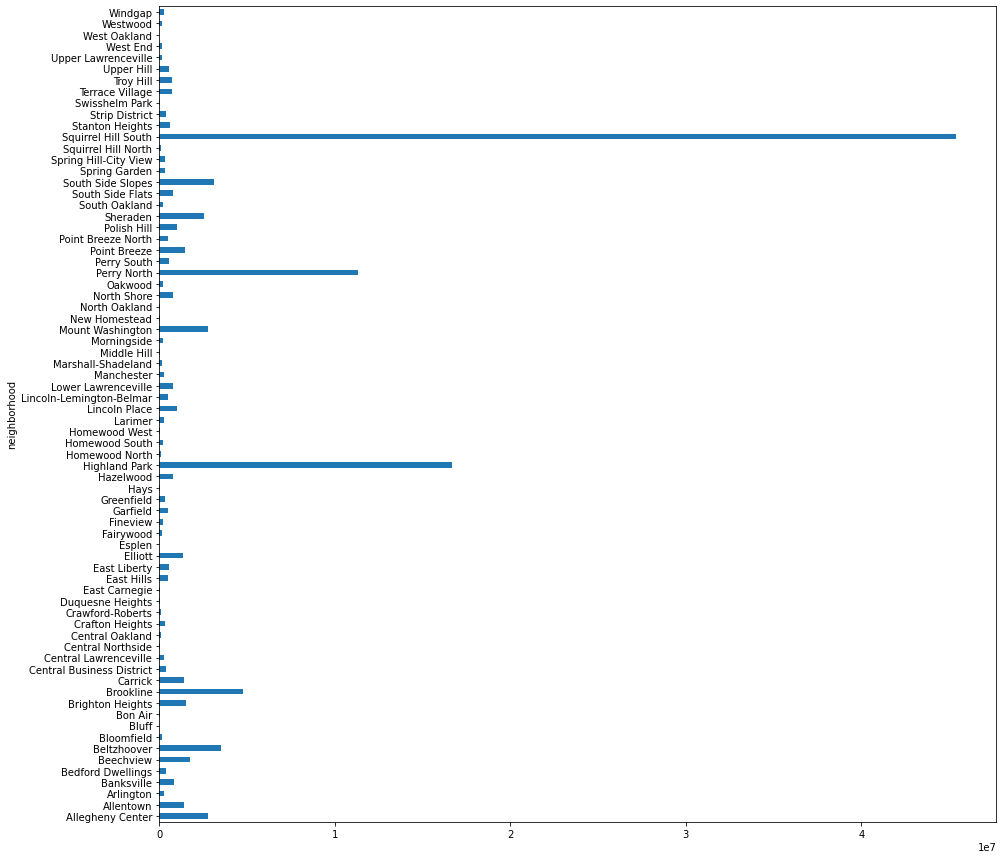

In [4]:
cparks = pd.read_csv("cityparks.csv")
pparks = pd.read_csv("pittparks.csv")

parks = pd.merge(cparks, pparks, left_on="name", right_on = "updatepknm")
parks = parks[["neighborhood", "sqft"]]

parks_graph = parks.pivot(columns = "neighborhood", values = "sqft")
parks_graph.sum().plot.barh(figsize = (15,15))

squirell hill south has the most sqft of parks in all of pittsburgh

### trees

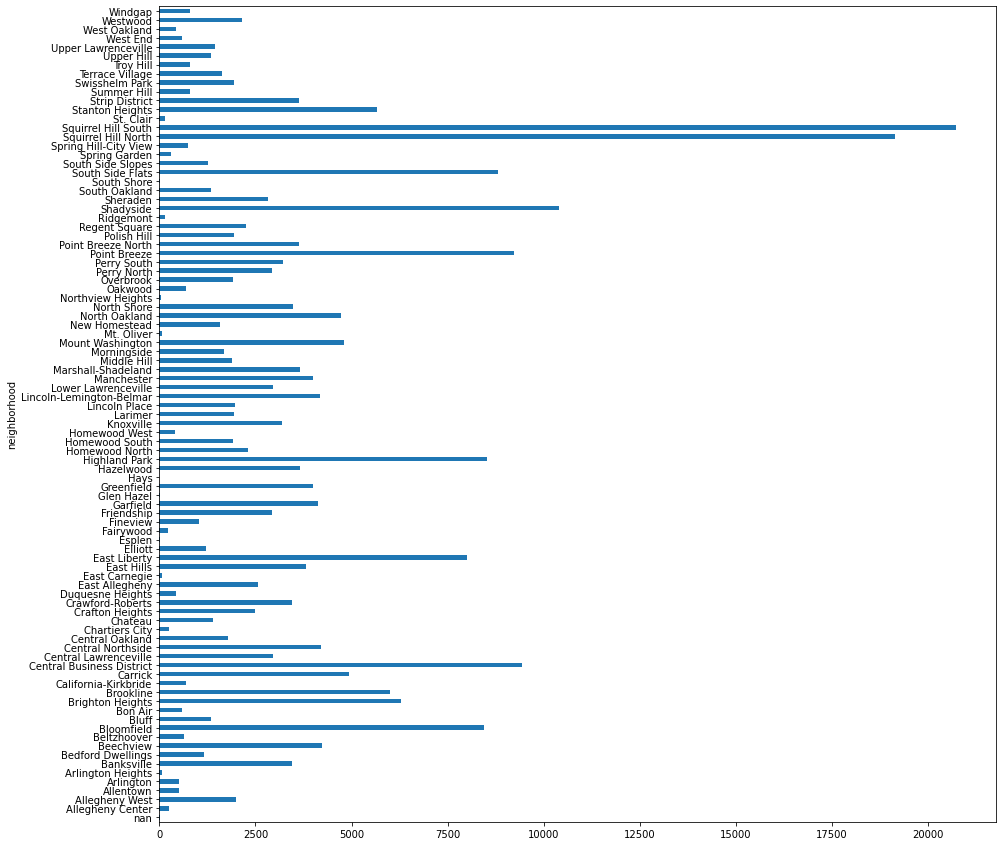

In [6]:
trees_data = pd.read_csv("trees.csv")

## remove values that are stumps
trees = trees_data.query("common_name != 'Stump'")
trees = trees[["neighborhood","width"]]

trees_graph = trees.pivot(columns = "neighborhood", values = "width")

trees_graph.sum().plot.barh(figsize = (15,15))

squirrel hill south also has the most city managed trees (by width) in pittsburgh

### total greenery